In [1]:
R.Version()$version.string

[1] "R version 4.1.0 (2021-05-18)"

In [2]:
library("DESeq2")
library("readxl")

Loading required package: S4Vectors

Loading required package: stats4

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which.max, which.min



Attaching package: ‘S4Vectors’


The following objects are masked from ‘package:base’:

    expand.grid, I, unname


Loading required package: IRanges

Loading required package: GenomicRanges

Loading required package: GenomeInfoDb

Loading required package: SummarizedExperiment

Loading required package: MatrixGe

In [3]:
imn_rna <- read_excel("../../data/iMN_DESeq_DataLevel3_20170426_COMPLETE.xlsx",sheet="iMNs_DESeq_JUL2015_all_merged")
condition_map <- read.table("../../nbdata/iMN_id_condition_map.tsv",header=TRUE,row.names=1,sep="\t",check.names=FALSE)

row_names <- imn_rna$gene
imn_rna = subset(imn_rna, select=-1)
rownames(imn_rna) <- row_names

Warning message:
“Setting row names on a tibble is deprecated.”


In [4]:
dds <- DESeqDataSetFromMatrix(countData = imn_rna,
                              colData = condition_map,
                              design = ~ Condition)

converting counts to integer mode

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”


In [5]:
keep <- rowSums(counts(dds)) >= 10
dds <- dds[keep,]

In [6]:
dds <- DESeq(dds)
res <- results(dds,contrast=c("Condition","ALS","CTR"))
resOrdered <- res[order(res$pvalue),]

estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

-- replacing outliers and refitting for 13 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)

estimating dispersions

fitting model and testing



In [7]:
dds

class: DESeqDataSet 
dim: 30852 20 
metadata(1): version
assays(6): counts mu ... replaceCounts replaceCooks
rownames(30852): ENSG00000110514 ENSG00000268358 ... ENSG00000182870
  ENSG00000182871
rowData names(27): baseMean baseVar ... maxCooks replace
colnames(20): A-042-00iCTR-003 A-042-00iCTR-004 ... A-042-83iSMA-003
  A-042-83iSMA-004
colData names(3): Condition sizeFactor replaceable

In [8]:
resOrdered

log2 fold change (MLE): Condition ALS vs CTR 
Wald test p-value: Condition ALS vs CTR 
DataFrame with 30852 rows and 6 columns
                  baseMean log2FoldChange     lfcSE      stat      pvalue
                 <numeric>      <numeric> <numeric> <numeric>   <numeric>
ERCC-00136       4449.1067       -1.96762  0.146315  -13.4478 3.17067e-41
ERCC-00131        257.8993       -2.01153  0.153220  -13.1284 2.26534e-39
ENSG00000234710    11.9274      -21.29832  1.661549  -12.8184 1.29422e-37
ERCC-00130      74444.1886       -1.97141  0.157895  -12.4856 8.94728e-36
ERCC-00095        294.7815       -2.10140  0.170735  -12.3080 8.20414e-35
...                    ...            ...       ...       ...         ...
ENSG00000250253   0.461977              0   3.65444         0           1
ENSG00000251918   0.415901              0   3.65444         0           1
ENSG00000207754   0.622526              0   3.65444         0           1
ENSG00000211892   0.447673              0   2.41731        

In [9]:
write.table(resOrdered, file = "../../nbdata/iMN_deseq2_condition.tsv",quote=TRUE,sep="\t")

## Visualization

In [10]:
resLFC <- lfcShrink(dds, coef="Condition_CTR_vs_ALS", type="apeglm")
png(file="../../figs/iMN_deseq2_lfc_counts.png",width=500, height=500)
plotMA(resLFC, ylim=c(-2,2),xlab="",ylab="")
title(
    main='Mean Counts vs. (ALS/CTR) Fold Change for 30852 genes in iMN',
    xlab='Mean Normalized Counts',
    ylab='Log(Fold Change)',
    cex.lab=1.5, cex.axis=1, cex.main=1.2, cex.sub=1.8
)
dev.off()

using 'apeglm' for LFC shrinkage. If used in published research, please cite:
    Zhu, A., Ibrahim, J.G., Love, M.I. (2018) Heavy-tailed prior distributions for
    sequence count data: removing the noise and preserving large differences.
    Bioinformatics. https://doi.org/10.1093/bioinformatics/bty895



png 
  2

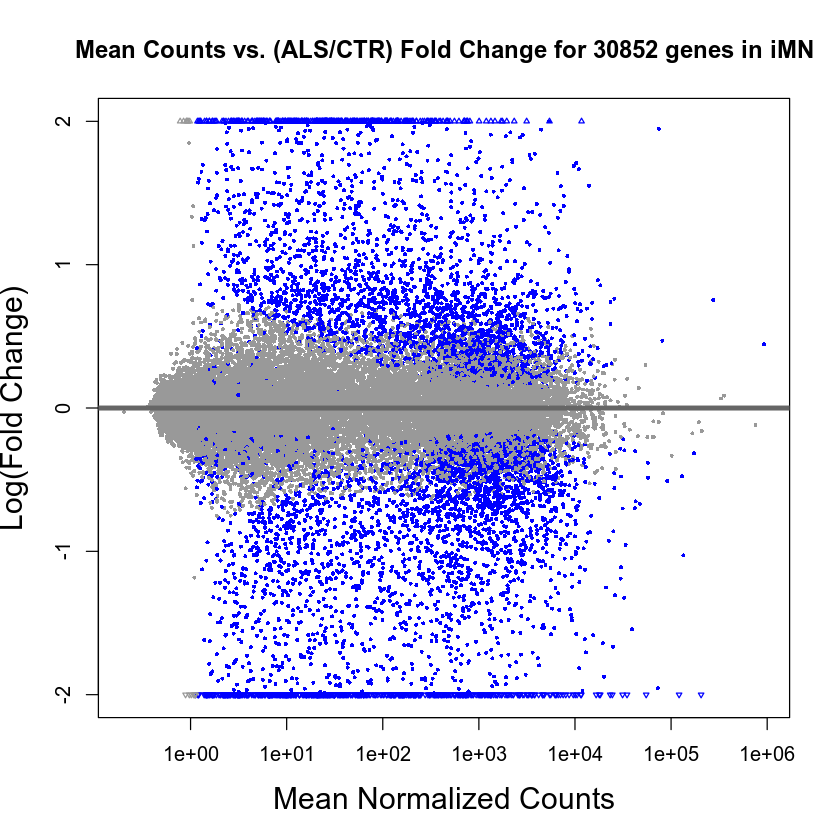

In [11]:
plotMA(resLFC, ylim=c(-2,2),xlab="",ylab="")
title(
    main='Mean Counts vs. (ALS/CTR) Fold Change for 30852 genes in iMN',
    xlab='Mean Normalized Counts',
    ylab='Log(Fold Change)',
    cex.lab=1.5, cex.axis=1, cex.main=1.2, cex.sub=1.8
)